# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

<b>some columns:</b><br>
●‘ScheduledDay’ tells us on what day the patient set up their appointment.<br>
● ‘Neighborhood’ indicates the location of the hospital.<br>
● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

<b>Questions to be answered in this notebook:</b><br>

- Which gender tends to show up more ?<br>
- Is there a relation between scholarship & show up?<br>
- Is there a relation between hipertension & show up?<br>
- Is there a relation between diabetes & show up?<br>
- Is there a relation between alcoholism & show up?<br>
- Is there a relation between handcap & show up?<br>
- Is there a relation between sms_received & show up?<br>
- What is the relation between age and show status?<br>
- What is the relation between neighbourhood and show status?<br>
- What is the relation between the features?

In [1]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('dataset/noshow_appointments.csv')

### First five records

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### size of our dataset

In [4]:
df.shape

(110527, 14)

#### We have 110527 record and 14 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### No Null in our dataset
#### Data types seems to be consistent

## Some Cleaning:
1- check duplicate<br>
2- remove appointment id column<br>
3- rename columns to be lowercase<br>
4- show statistics to clean any inconsistent data info<br>
5- convert appointment day & schedueled day to datetime<br>

### 1- check duplicates

In [6]:
df.duplicated().sum()

0

In [7]:
df.AppointmentID.duplicated().sum()

0

In [8]:
df.PatientId.duplicated().sum()

48228

#### It seems that no duplicates in appointment id
#### duplicates in patient id which tells that patients booked more than one time

In [9]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

### 2- remove unnecessary columns 

In [10]:
#remove columns
df.drop(columns=['AppointmentID'], axis=1, inplace=True)

### 3- Rename columns

In [11]:
#rename columns
df.rename(columns = lambda x: x.replace('-', '_').lower(), inplace = True)

In [12]:
df.columns

Index(['patientid', 'gender', 'scheduledday', 'appointmentday', 'age',
       'neighbourhood', 'scholarship', 'hipertension', 'diabetes',
       'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

### 4- clean in consistent data

In [13]:
# show statistics
df.describe()

,patientid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### some notes to clean:
1- min age is -1 which is inconsitent and must be cleaned<br>
2- max age is 115 which may also be not common

In [14]:
df.query('age <= 0').shape

(3540, 13)

In [15]:
df.query('age > 100').shape

(7, 13)

### We have 3540 values of age <= zero 
### We have 7 values of age > 100
### which must be cleaned
Imputing with median to overcome effect of outliers

In [16]:
median_age = df.age.median()
num_records = df.query('age <= 0').shape[0]
median_age_col = np.repeat(median_age, num_records)
#impute in df
df.loc[df['age'] <= 0, 'age'] = median_age_col

In [17]:
df.query('age <= 0')

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


### drop records with age > 100

In [18]:
df = df.query('age <= 100')

In [19]:
df.describe()

,patientid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105200e+05,110520.000000,110520.000000,110520.000000,110520.000000,110520.000000,110520.000000,110520.000000
mean,1.474888e+14,38.269309,0.098272,0.197249,0.071869,0.030402,0.022213,0.321037
std,2.560832e+14,22.097732,0.297683,0.397924,0.258273,0.171691,0.161441,0.466877
min,3.921784e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.172723e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439068e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,100.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### 5- convert appointment day & schedueled day to datetime

In [20]:
df.columns

Index(['patientid', 'gender', 'scheduledday', 'appointmentday', 'age',
       'neighbourhood', 'scholarship', 'hipertension', 'diabetes',
       'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

In [21]:
df.scheduledday = pd.to_datetime(df.scheduledday)
df.appointmentday = pd.to_datetime(df.appointmentday)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110520 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110520 non-null  float64            
 1   gender          110520 non-null  object             
 2   scheduledday    110520 non-null  datetime64[ns, UTC]
 3   appointmentday  110520 non-null  datetime64[ns, UTC]
 4   age             110520 non-null  float64            
 5   neighbourhood   110520 non-null  object             
 6   scholarship     110520 non-null  int64              
 7   hipertension    110520 non-null  int64              
 8   diabetes        110520 non-null  int64              
 9   alcoholism      110520 non-null  int64              
 10  handcap         110520 non-null  int64              
 11  sms_received    110520 non-null  int64              
 12  no_show         110520 non-null  object             
dtypes: datetime64[

#### We have finished cleaning the data, let's start EDA

<a id='eda'></a>
## Exploratory Data Analysis

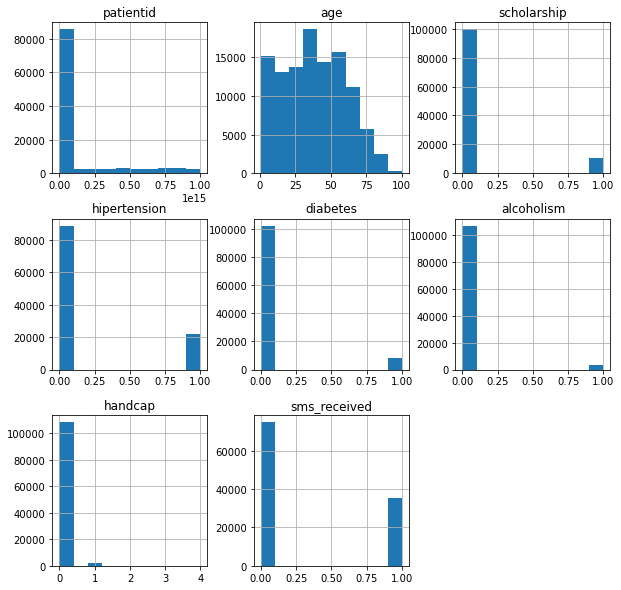

In [23]:
_ = df.hist(figsize=(10,10))
plt.show()

show = df['no_show'] == 'No'
no_show = df['no_show'] == 'Yes'- Most patients have no scholarsip<br>
- Most patients have no hypertension<br>
- Most patients have no diabetes<br>
- Most patients have no alcoholism<br>
- Most patients have no handcap<br>
- Most patients did not recieve sms

In [24]:
#boolean masking for df to select show vs no_show
show = df['no_show'] == 'No'
no_show = df['no_show'] == 'Yes'

### Research Question 1 ( Which gender tends to show up more ? )
#### showup
No means the patient went to the appointment<br>
Yes means the patient did not go to the appointment

In [25]:
df.gender.value_counts()

F    71833
M    38687
Name: gender, dtype: int64

Text(0.5, 1.0, 'Gender distribution in dataset')

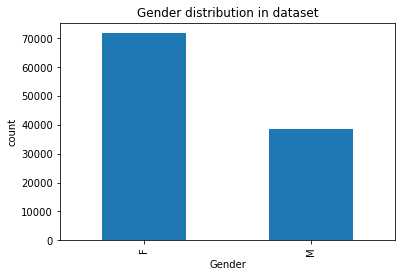

In [26]:
df.gender.value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('count')
plt.title('Gender distribution in dataset')

### Female patients around double times male patients

Text(0.5, 1.0, 'Relation between Gender & show status')

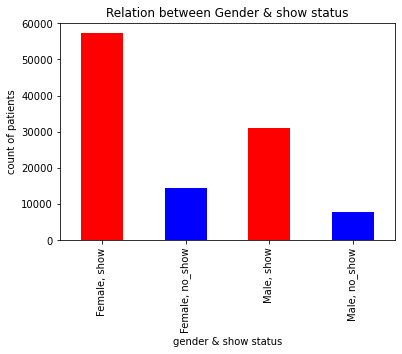

In [27]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.groupby(['gender', 'no_show'])['age'].count().plot(kind='bar', color=['r','b'])
plt.xticks([0,1,2,3], ['Female, show','Female, no_show','Male, show','Male, no_show'])
plt.xlabel('gender & show status')
plt.ylabel('count of patients')
plt.title('Relation between Gender & show status')

In [28]:
df.groupby(['gender', 'no_show'])['age'].count()

gender  no_show
F       No         57242
        Yes        14591
M       No         30962
        Yes         7725
Name: age, dtype: int64

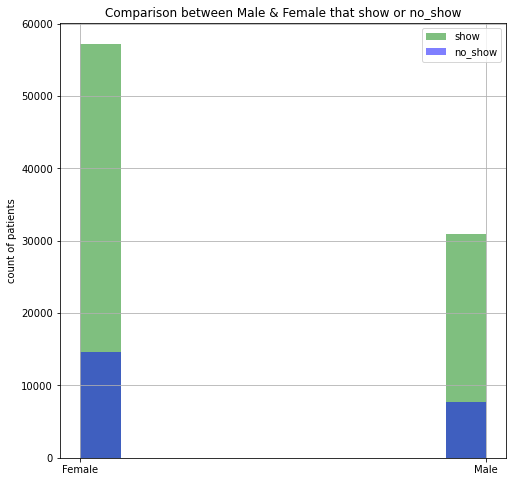

In [29]:
plt.figure(figsize=(8,8))
df[show].gender.hist(alpha=0.5, label='show', color = 'green')
df[no_show].gender.hist(alpha=0.5, label='no_show', color='blue')
plt.xticks([0, 1], ['Female', 'Male' ])
plt.legend()
plt.ylabel('count of patients')
plt.title('Comparison between Male & Female that show or no_show')
plt.show()

#### More Females tend to no_show more than females

### Research Question 2  (Is there a relation between scholarship & show up?)

Text(0.5, 1.0, 'Scholarship distribution in dataset')

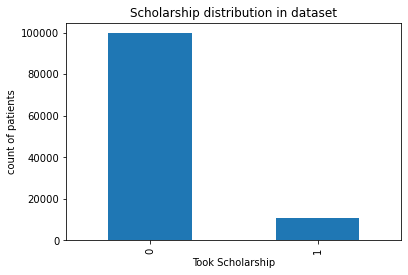

In [30]:
df.scholarship.value_counts().plot(kind='bar')
plt.xlabel('Took Scholarship')
plt.ylabel('count of patients')
plt.title('Scholarship distribution in dataset')

### function to plot relation between column & our target no_show status

In [31]:
def plot_relation(column, label):
    """
    function to plot relation between column and our target no_show as bar plot
    
    parameters:
    column (str): the column name to plot relation with
    label (str): label name to put in chart legend
    
    Returns:
    the complete bar plot between column and the target no_show
    
    """
    plt.figure(figsize=(8,8))
    df[df[column] == 1].no_show.hist(alpha=0.5, color='blue', label= label)
    plt.legend()
    plt.title('Relation between {} and show state'.format(column))
    plt.ylabel('count of patients')
    plt.xticks([0,1], ['Show', 'No show'])
    plt.show()

### small percentage with scholarship in our dataset

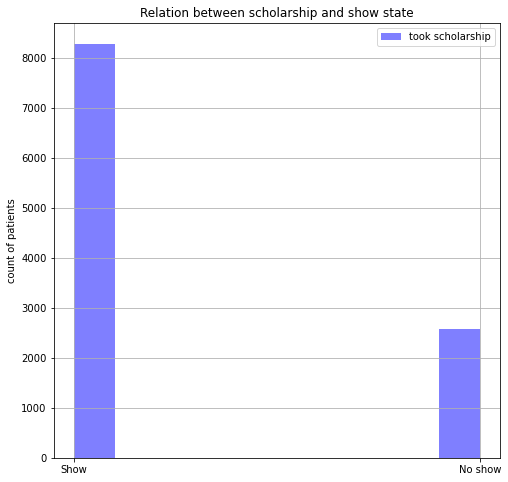

In [32]:
plot_relation('scholarship', 'took scholarship') 

#### Most of those with scholarship were show

### Research Question 3  (Is there a relation between hipertension & show up?)

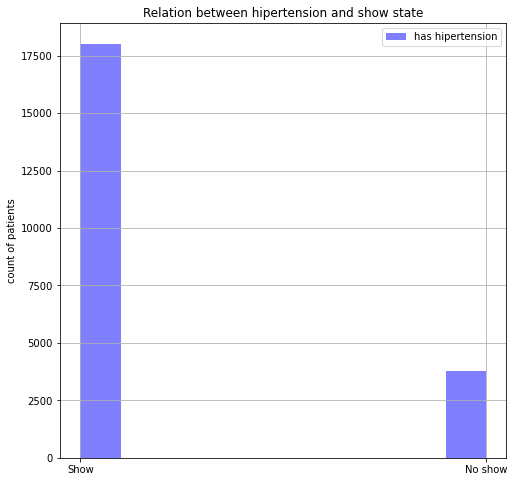

In [33]:
plot_relation('hipertension', 'has hipertension') 

#### Most of those with hipertension were show

### Research Question 4  (Is there a relation between diabetes & show up?)

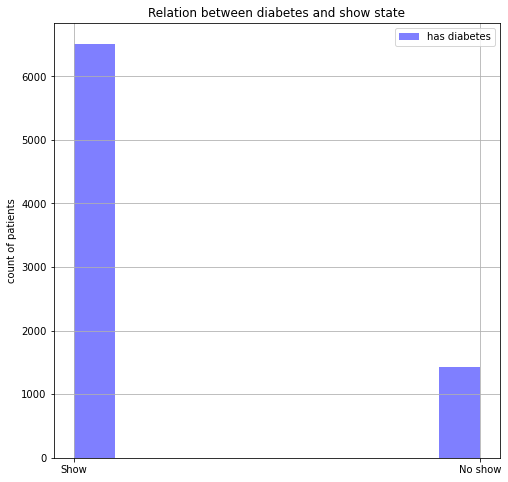

In [34]:
plot_relation('diabetes', 'has diabetes') 

#### Most of those with diabetes were show

### Research Question 5  (Is there a relation between alcoholism & show up?)

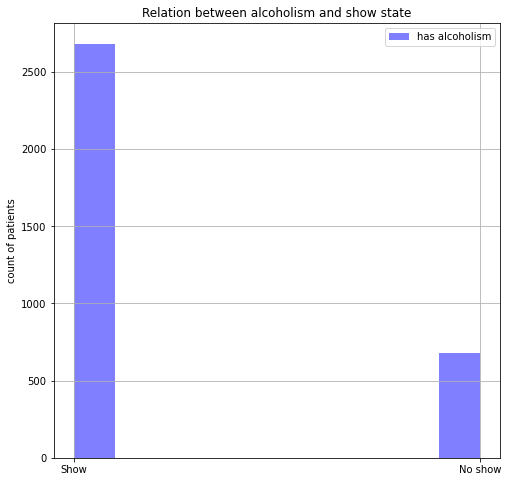

In [35]:
plot_relation('alcoholism', 'has alcoholism') 

#### Most of those with alcoholism were show

### Research Question 6 (Is there a relation between handcap & show up?)

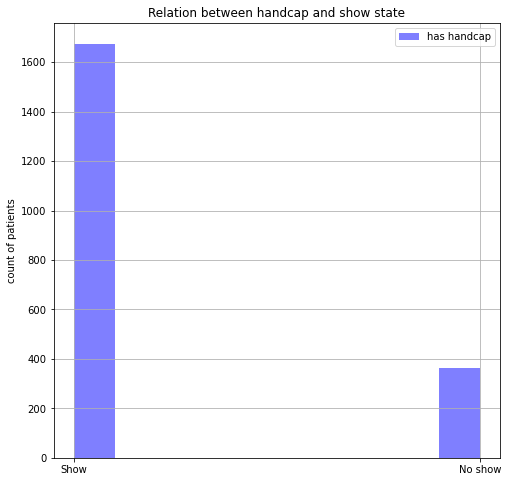

In [36]:
plot_relation('handcap', 'has handcap') 

#### Most of those with handcap were show

### Research Question 7 (Is there a relation between sms_received & show up?)

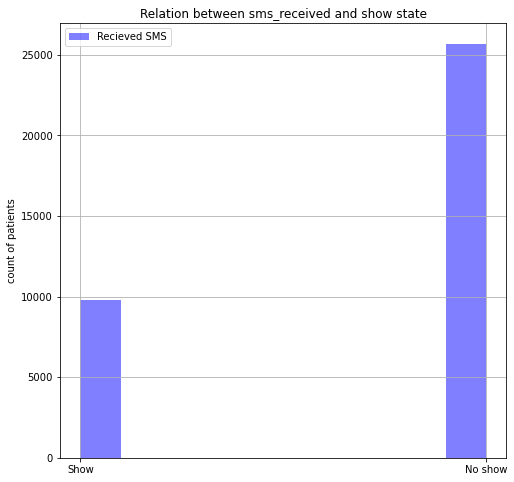

In [37]:
plot_relation('sms_received', 'Recieved SMS') 

#### Most of those recieved sms did not show !!!

## From above questions We deduce that:
### - Positive correlation between showing states and next features:<br>
#### gender, scholarship, hipertension, diabetes, alcoholism, handcap <br>
### - Negative correlation to: <br>
#### sms_received

### Research Question 8 (What is the relation between age and show status?)

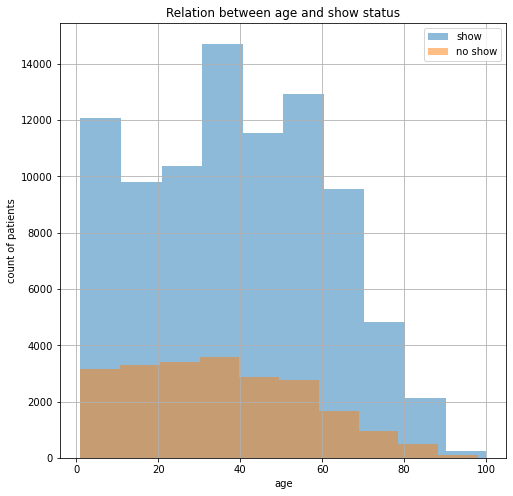

In [38]:
plt.figure(figsize=(8,8))
df[show].age.hist(alpha=0.5, label='show')
df[no_show].age.hist(alpha=0.5, label='no show')
plt.legend()
plt.xlabel('age')
plt.ylabel('count of patients')
plt.title('Relation between age and show status')
plt.show()

#### Most of those to show are between 30 to 40 then 50 to 60 then 0 to 10
#### From 0 to 40 have approximately near rate of no show
#### age more than 70 have lowest no show rate, they are the most to keep showing

### Research Question 9 (What is the relation between neighbourhood and show status?)

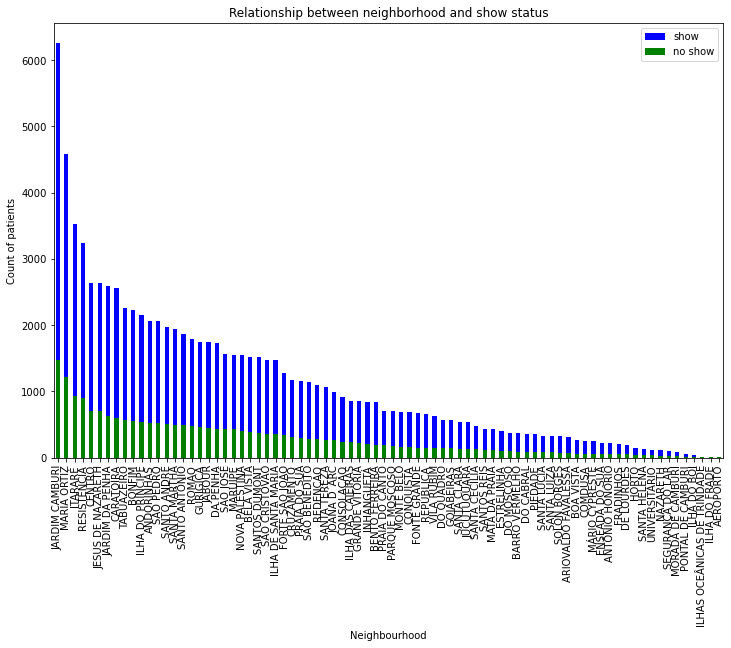

In [39]:
plt.figure(figsize=(12,8))
df[show].neighbourhood.value_counts().plot(kind='bar', color='blue', label='show')
df[no_show].neighbourhood.value_counts().plot(kind='bar', color='green', label='no show')
plt.legend()
plt.xlabel('Neighbourhood')
plt.ylabel('Count of patients')
plt.title('Relationship between neighborhood and show status')
plt.show()

### It is clear that some neigbourhoods have very high show status and others are exponentially decreasing So neighbourhood highly affects show status

### Research Question 10 (What is the relation between the features?)

In [40]:
df.corr()

,patientid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
patientid,1.000000,-0.003055,-0.002871,-0.006481,0.001614,0.011017,-0.007817,-0.009776
age,-0.003055,1.000000,-0.111685,0.501175,0.290934,0.090745,0.073619,0.005530
scholarship,-0.002871,-0.111685,1.000000,-0.019732,-0.024899,0.035019,-0.008521,0.001186
hipertension,-0.006481,0.501175,-0.019732,1.000000,0.433095,0.087972,0.080248,-0.006312
diabetes,0.001614,0.290934,-0.024899,0.433095,1.000000,0.018470,0.057628,-0.014557
alcoholism,0.011017,0.090745,0.035019,0.087972,0.018470,1.000000,0.004689,-0.026152
handcap,-0.007817,0.073619,-0.008521,0.080248,0.057628,0.004689,1.000000,-0.024027
sms_received,-0.009776,0.005530,0.001186,-0.006312,-0.014557,-0.026152,-0.024027,1.000000


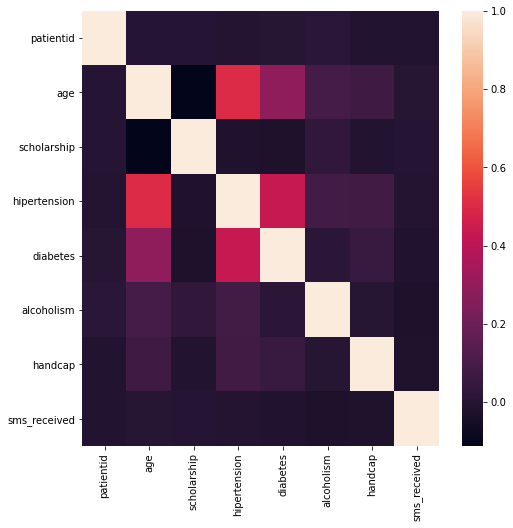

In [41]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr())
plt.show()

### From correlation matrix & heatmap there is colinearity between age, diabetes, hipertension

In [42]:
plt.figure(figsize=(8,8))
df[has_diabetes].hipertension.hist(label='has diabetes')
plt.xlabel('has hipertension')
plt.ylabel('count of patients')
plt.title('Relation between diabetes and hipertension')
plt.xticks([0,1], ['No', 'Yes'])
plt.legend()
plt.show()

NameError: name 'has_diabetes' is not defined

<Figure size 576x576 with 0 Axes>

### Clear that Most of those with diabetes have also hipertension

In [ ]:
plt.figure(figsize=(8,8))
df[has_hipertension].diabetes.hist(label='has hipertension')
plt.xlabel('has diabetes')
plt.ylabel('count of patients')
plt.title('Relation between hipertension nad diabetes')
plt.xticks([0,1], ['No', 'Yes'])
plt.legend()
plt.show()

### Clear that the inverse is not true!  Most of those with hipertension do not have diabetes

<a id='conclusions'></a>
## Conclusions
- Most patients have no hypertension<br>
- Most patients have no diabetes<br>
- Most patients have no alcoholism<br>
- Most patients have no handcap<br>
- Most patients did not recieve sms<br>
- Female patients around double times male patients<br>
- More Females tend to no_show more than females<br>
- Most of those with scholarship were show<br>
- Most of those with hipertension were show<br>
- Most of those with diabetes were show<br>
- Most of those with alcoholism were show<br>
- Most of those with handcap were show<br>
- Most of those recieved sms did not show !!!<br>
- Most of those to show are between 30 to 40 then 50 to 60 then 0 to 10<br>
- From 0 to 40 age have approximately near rate of no show<br>
- age more than 70 have lowest no show rate, they are the most to keep showing<br>
- It is clear that some neigbourhoods have very high show status and others are exponentially decreasing So neighbourhood highly affects show status<br>
- Most of those with diabetes have also hipertension but the inverse is not true! Most of those with hipertension do not have diabetes

## Limitations
#### 1- I have Imputed ages less than or equal to zero with the median of age which may affect negatively in the analysis
#### 2- there is no strong and clear relationship between most of features with our target
#### 3- imbalance in data as female patients around double times male patients so may make some bias